In [6]:
import pandas as pd
df = pd.read_csv('nhl-projections.csv')
df['Points'] = df['Points'] + df['FO']
df['PPP'] = df['PPG'] + df['PPA']
df['SHP'] = df['SHG'] + df['SHA']
df.head()

,Rank,Player Name,Team,Pos,GP,G,A,Pts,+/-,PIM,...,SA,SV,SV%,SO,Skater Points,Goalie Points,Points,FO,PPP,SHP
0,2.0,Connor McDavid,EDM,C,82,42,78,120,17,27,...,0,0,0.0,0,658.35,0.0,645.95,-12.4,36,2
1,1.0,Nikita Kucherov,TB,RW,81,41,73,114,22,58,...,0,0,0.0,0,622.60,0.0,622.00,-0.6,44,1
2,3.0,Nathan MacKinnon,COL,C,80,40,59,99,16,42,...,0,0,0.0,0,622.00,0.0,592.20,-29.8,39,1
3,4.0,Brad Marchand,BOS,LW,78,38,58,96,19,88,...,0,0,0.0,0,549.10,0.0,546.10,-3.0,33,5
4,10.0,Sidney Crosby,PIT,C,80,34,61,95,11,40,...,0,0,0.0,0,559.40,0.0,599.00,39.6,34,0


In [83]:
def remove_players(players):
    global df
    if isinstance(players, list):
        try:
            df.drop(df[df['Player Name'].isin(players)].index, inplace=True)
            return True
        except:
            return False
    else:
        try:
            df.drop(df[df['Player Name']==players].index, inplace=True)
            return True
        except:
            return False
players = []
players = "Ryan O'Reilly"
remove_players(players)

True

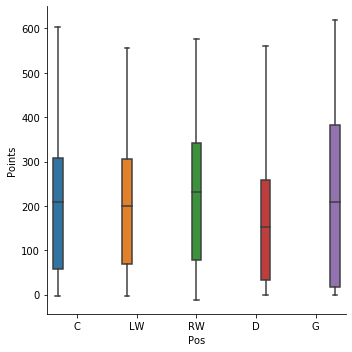

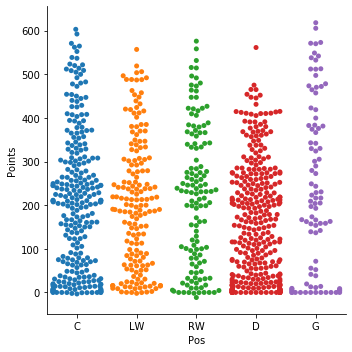

In [74]:
import seaborn as sns
sns.catplot(x='Pos', y='Points', hue='Pos',data=df, kind='box')
sns.catplot(x='Pos', y='Points', hue='Pos',data=df, kind='swarm')

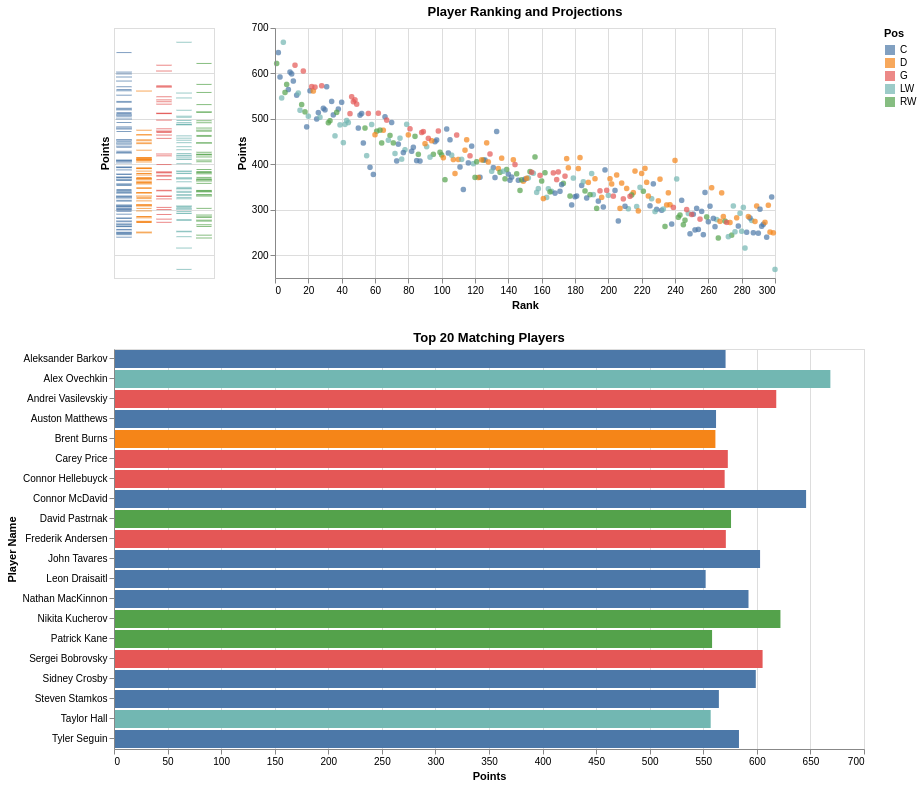

In [24]:
import altair as alt

data = df[~df.Rank.isna()] #df.sort_values('Points', ascending=False).iloc[:500]

#Intersection of 2 selections
brush = alt.selection_interval(empty='all',)
pos_selection = alt.selection_multi(fields=['Pos'], empty='all')
selected = brush & pos_selection

#Color conditions for all selections
color = alt.condition(brush,
                      alt.Color('Pos:N'),
                      alt.value('lightgray'))

legend_color = alt.condition(pos_selection,
                      alt.Color('Pos:N', legend=None),
                      alt.value('lightgray'))

#selected_color = alt.condition(brush & pos_selection,
#                      alt.Color('Pos:N', legend=None),
#                      alt.value('lightgray'))



base = alt.Chart(data)

scatter = base.add_selection(brush).mark_circle().encode(
    x='Rank:Q',
    y=alt.Y('Points:Q', scale=alt.Scale(domain=(150,700))),
    color=color,
    tooltip=['Player Name','Team','Pos','Points']
).properties(
    width=500,
    height=250,
    title='Player Ranking and Projections'
)

#legend = base.mark_point().encode( #.add_selection(pos_selection)
#    y=alt.Y('Pos:N', axis=alt.Axis(orient='right', ticks=False, grid=False)),
#    color=alt.Color('Pos:N', legend=None)
#)

# Configure the ticks
tick_axis = alt.Axis(labels=False, domain=False, ticks=False)
y_ticks = base.mark_tick().encode(
    alt.X('Pos:N', title='', axis=tick_axis),
    alt.Y('Points:Q', axis=tick_axis, scale=alt.Scale(domain=(150,700))),
    color=color
).properties(height=250)

bars = base.mark_bar(limit=10).encode(
    y='Player Name:N',
    color=color,
    x=alt.X('Points:Q', scale=alt.Scale(zero=False, domain=(0,700))),
    tooltip=['Rank','Points','G','A','PIM','SOG','GWG','PPP','SHP','Hits','BS','GP','W','SA','GA','SO']
).transform_filter(
    brush
).transform_window(
    idx='rank(Points)',
    sort=[alt.SortField('Points', order='descending')]
).transform_filter(
    (alt.datum.idx <= 20)
).properties(width=750, title='Top 20 Matching Players')

#alt.hconcat(y_ticks, scatter) 

alt.vconcat(alt.hconcat(y_ticks, scatter) , bars)

In [25]:
alt.vconcat(alt.hconcat(y_ticks, scatter) , bars).save('draft-chart.html',format='html')